## Q1 b)

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return  pow(x,18) / (x + 7)
a = 0; b = 1

In [3]:
x18, err = scipy.integrate.quad(f, a, b)
print("The approximation of x18 is ", x18, ", the error is ", err)

The approximation of x18 is  0.006620563824579688 , the error is  7.350302394048756e-17


In [4]:
def fb(x,n):
    return (1/n - x) / 7
def ff(x,n):
    return 1/n - 7*x

In [5]:
xb = np.zeros(19)
xb[18] = x18
for i in range(len(xb)-2,-1,-1):
    xb[i] = fb(xb[i+1],i+1)
print(f"xn by backward recurrence formulas:\n{xb}")

xn by backward recurrence formulas:
[0.13353139 0.06528025 0.04303824 0.03206566 0.02554036 0.02121749
 0.01814422 0.01584763 0.01406657 0.01264509 0.01148435 0.01051866
 0.0097027  0.00900417 0.00839942 0.00787076 0.00740469 0.00699071
 0.00662056]


In [6]:
xf = np.zeros(19)
xf[0] = np.log(8/7)
for i in range(1,len(xf)):
    xf[i] = ff(xf[i-1],i)
print(f"xn by forward recurrence formulas:\n{xf}")

xn by forward recurrence formulas:
[ 0.13353139  0.06528025  0.04303824  0.03206566  0.02554036  0.02121749
  0.01814422  0.01584763  0.01406657  0.0126451   0.01148433  0.01051875
  0.00970209  0.00900842  0.00836967  0.008079    0.00594698  0.01719466
 -0.06480705]


The result given by backwards recurrence formulas is much more accurate than that of forward recurrence formulas.

In [7]:
float_info = np.finfo(float)
x0err = xf[0] - xb[0]
x18err = xf[18]-xb[18]
print(f" the difference between x0 times 7^18 {x0err*pow(7,18)}\n the difference between x18 {x18err}")

 the difference between x0 times 7^18 -0.09039511350064361
 the difference between x18 -0.0714276134172489


absolute value of errors are 
[5.55111512e-17 3.05311332e-16 2.15105711e-15 1.50435220e-14
 1.05315062e-13 7.37212374e-13 5.16047621e-12 3.61233231e-11
 2.52863263e-10 1.77004285e-09 1.23902999e-08 8.67320995e-08
 6.07124696e-07 4.24987288e-06 2.97491101e-05 2.08243771e-04
 1.45770640e-03 1.02039448e-02 7.14276134e-02]


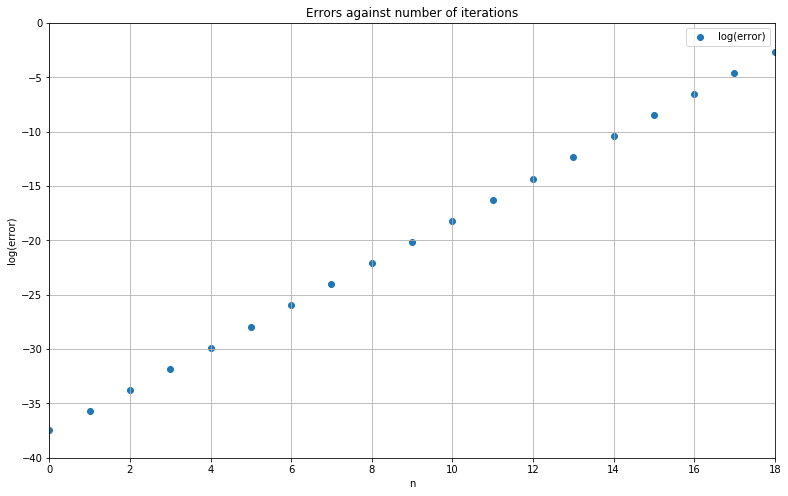

In [8]:
error = abs(xf-xb)
print(f"absolute value of errors are \n{error}")
n = np.linspace(0,18,19)
plt. figure(figsize= (13,8))
# plt.axes(yscale = "log")
plt.scatter(n,np.log(error),label='log(error)') 
plt.title('Errors against number of iterations')
plt. xlabel('n')
plt.ylabel('log(error)')
plt. xlim(0,18)
plt.ylim(-40,0)
plt.legend(loc='best')
plt.grid()
plt.show()

In [9]:
float_info = np.finfo(float)
x0err = xf[0] - xb[0]
x18err = xf[18]-xb[18]
print(f" the difference between x0 times 7^18 {x0err*pow(7,18)}\n the difference between x18 {x18err}")

 the difference between x0 times 7^18 -0.09039511350064361
 the difference between x18 -0.0714276134172489


The errors clearly forms a line in log scale, this means the error is multiplied by a certain number when we using the reccurence formulae to find the result. We can clearly find that when applying forwards and backwards recurrence formulas, together with the value of xn, the error is multiplies by 7 and 1/7 in each iteration respectively. Therefore after a number of iterations, the error by forwards reccurence formula is multiplied by 7^18 which is obviously a large number, while the error in backwards reccurence formula is multiplied by (1/7)^18, which makes the starting error extermly small. The above results proves the error is roughly multiplied by 7^18 after 18 iterations.